# <center><span style='color:Red;font-size:50px;line-height:20px'> Netflix</span></center>
# <center><span style='color:Red'> Data Analysis and Visualization </span></center>

![](https://assets.brand.microsites.netflix.io/assets/f8b5b940-81a4-11e9-bf79-066b49664af6.gif?v=2)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
ndf = pd.read_csv('../input/netflix-shows/netflix_titles.csv', index_col='show_id')
ndf.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [3]:
# checking missing data

for i in ndf.columns:
  null = ndf[i].isnull().sum()
  if null == 0:
    continue
  print('{} null rate: {:.2f}%'.format(i, null/len(ndf)*100))

director null rate: 30.68%
cast null rate: 9.22%
country null rate: 6.51%
date_added null rate: 0.13%
rating null rate: 0.09%


# Handling data with missing values
*   replace missing values in country data with the most common country values
*   keep director and cast columns
*   drop any missing values from other columns



In [4]:
#@title Default title text
# replace missing values

ndf.country.fillna(ndf.country.mode()[0], inplace=True)

ndf.cast.fillna('Unknown', inplace=True)
ndf.director.fillna('Unknown', inplace=True)

# drop missing values

ndf.dropna(inplace=True)

# drop duplicates

ndf.drop_duplicates(inplace=True)

In [5]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, s1 to s7787
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7770 non-null   object
 1   title         7770 non-null   object
 2   director      7770 non-null   object
 3   cast          7770 non-null   object
 4   country       7770 non-null   object
 5   date_added    7770 non-null   object
 6   release_year  7770 non-null   int64 
 7   rating        7770 non-null   object
 8   duration      7770 non-null   object
 9   listed_in     7770 non-null   object
 10  description   7770 non-null   object
dtypes: int64(1), object(10)
memory usage: 728.4+ KB


# Convert date columns to datetime format

In [6]:
ndf.date_added = pd.to_datetime(ndf.date_added)

ndf['month_added'] = ndf.date_added.dt.month_name()
ndf['year_added'] = ndf.date_added.dt.year

ndf.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
show_id,,,,,,,,,,,,,
s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,2020
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,2016
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,2018


# Analysis of Movies & TV Shows distribution

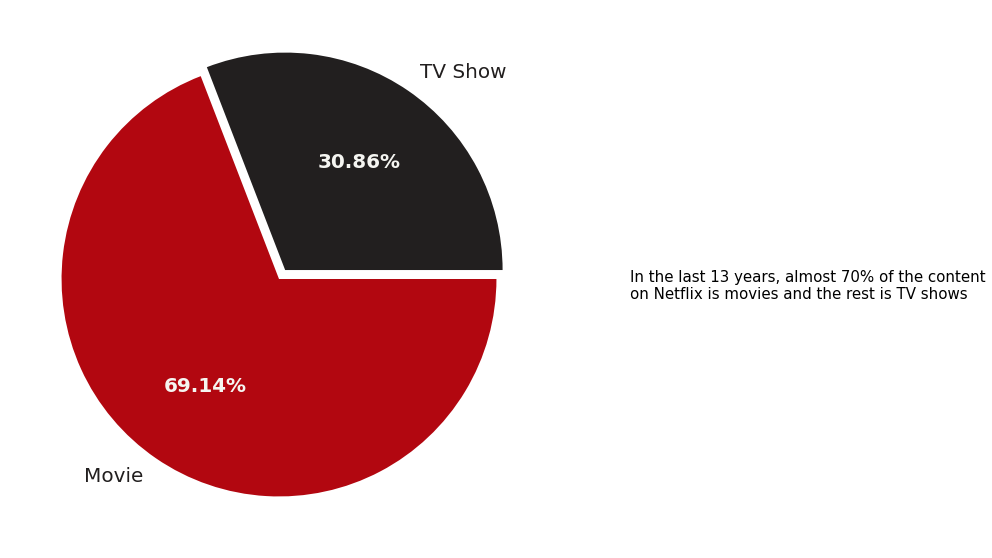

In [7]:
fig = plt.figure(figsize=(10,10))
wedges, texts, autotexts = plt.pie(ndf['type'].value_counts().sort_values(),
        labels=ndf['type'].value_counts().sort_values().index,
        explode=[0.05,0],
        autopct='%1.2f%%',
        textprops=dict(family='sans-serif', size=20),
        colors=['#221f1f', '#b20710'])

plt.setp(texts, color='#221f1f')
plt.setp(autotexts, color='#f5f5f1', weight='bold')

fig.text(1, .45, '''
In the last 13 years, almost 70% of the content
on Netflix is movies and the rest is TV shows
'''
    , fontsize=15, fontweight='light')

plt.show()

# Top 10 countries with the most amount of content on Netflix

In [8]:
# some content has more than one country listed. 
# we'll parse each country from the data with that nested list. 

from collections import Counter

country_data = ndf['country']
country_count = Counter(','.join(country_data).replace(' ,',',').replace(', ',',').split(','))
country_count = pd.Series(dict(country_count)).sort_values(ascending=False)

# top 10 countries

top10Country = country_count.head(10)

# abbreviate the names of several countries

top10Country.rename({'United States':'US', 'United Kingdom':'UK', 'South Korea':'S. Korea'}, inplace=True)

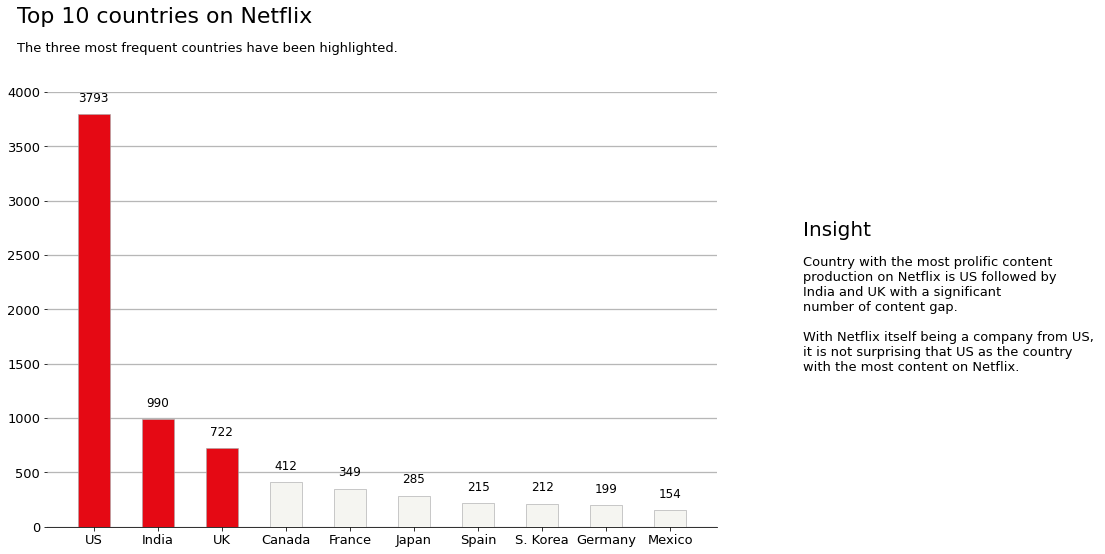

In [9]:
# Plot

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#e50914' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 8))
ax.bar(top10Country.index, top10Country, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

# annotations

for i in top10Country.index:
    ax.annotate("{}".format(top10Country[i]),
                xy=(i, top10Country[i] + 150),
                va = 'center', ha='center',fontweight='light', fontsize=12)

# remove border from barplot

[ax.spines[i].set_visible(False) for i in ['top', 'left', 'right']]

plt.xticks(range(10), top10Country.index, fontsize=13)

ax.grid(axis='y', linestyle='-', linewidth = 1.3, alpha=0.9)   
grid_y_ticks = np.arange(0, 4500, 500)
plt.yticks(grid_y_ticks, fontsize=13)

ax.set_axisbelow(True)

# add title and sub-title

fig.text(0.09, 1, 'Top 10 countries on Netflix', fontsize=22, fontweight='light')
fig.text(0.09, 0.95, 'The three most frequent countries have been highlighted.', fontsize=13, fontweight='light')

# add insight text

fig.text(1, .63, 'Insight', fontsize=20, fontweight='light')
fig.text(1, .37, '''
Country with the most prolific content 
production on Netflix is US followed by 
India and UK with a significant 
number of content gap.

With Netflix itself being a company from US, 
it is not surprising that US as the country 
with the most content on Netflix.
'''
         , fontsize=13, fontweight='light')

plt.show()

# Displays how content was added

## Content added over times

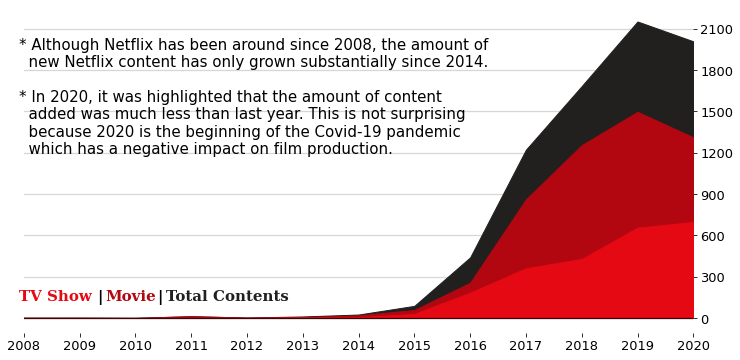

In [10]:
# select the data

columns = ndf['type'].value_counts().index
index = ndf['year_added'].value_counts().index

data_ya = pd.DataFrame(index=index).sort_index()
for col in columns:
  data_ya[col] = ndf.loc[ndf['type']==col, 'year_added'].value_counts()
data_ya.fillna(0, inplace=True)

# plot

fig, ax = plt.subplots(1, 1, figsize=(12,6))
color_map = ["#b20710", "#e50914", "#221f1f"]

ax.fill_between(data_ya.index, 0, data_ya.sum(axis=1),
                color=color_map[2],
                label=data_ya.sum(axis=1))
for i, col in enumerate(columns):
  ax.fill_between(data_ya[col].index, 0, data_ya[col], 
                  color=color_map[i], 
                  label=data_ya[col])


ax.set_xlim(2008, 2020)
plt.xticks(np.arange(2008, 2021, 1), fontsize=13)

ax.yaxis.tick_right()
ax.grid(axis='y', linestyle='-', linewidth = 1.3, alpha=0.5)
plt.yticks(np.arange(0, 2400, 300), fontsize=13)
ax.set_axisbelow(True)

for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

fig.text(0.12,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color=color_map[1])
fig.text(0.21,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.22,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color=color_map[0])
fig.text(0.28,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.29,0.2,"Total Contents", fontweight="bold", fontfamily='serif', fontsize=15, color=color_map[2])

fig.text(0.12,0.5, '''
* Although Netflix has been around since 2008, the amount of 
  new Netflix content has only grown substantially since 2014.

* In 2020, it was highlighted that the amount of content 
  added was much less than last year. This is not surprising 
  because 2020 is the beginning of the Covid-19 pandemic 
  which has a negative impact on film production.
''', fontweight="light", fontsize=15)

plt.show()

## Content added by months

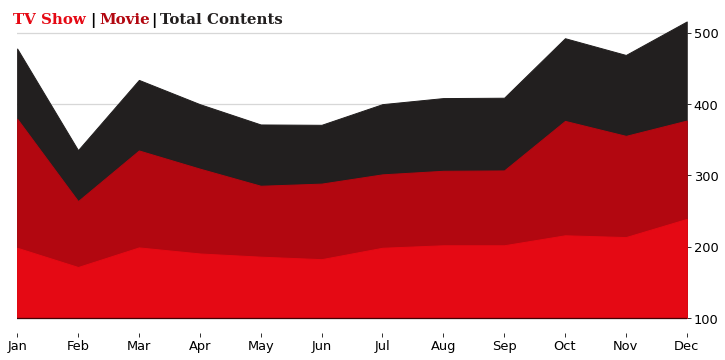

In [11]:
# select the data

columns = ndf['type'].value_counts().index
index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

data_ma = pd.DataFrame(index=index)
for col in columns:
  data_ma[col] = ndf.loc[ndf['type']==col, 'month_added'].value_counts()
data_ma.fillna(0, inplace=True)

# abbreviate the month name

for idx in index:
  data_ma.rename({idx:idx[:3]}, inplace=True)


# plot

fig, ax = plt.subplots(1, 1, figsize=(12,6))
color_map = ["#b20710", "#e50914", "#221f1f"]

ax.fill_between(data_ma.index, 0, data_ma.sum(axis=1),
                color=color_map[2],
                label=data_ma.sum(axis=1))
for i, col in enumerate(columns):
  ax.fill_between(data_ma[col].index, 0, data_ma[col], 
                  color=color_map[i], 
                  label=data_ma[col])

ax.set_xticklabels(data_ma.index, fontsize=13)

ax.yaxis.tick_right()
ax.set_yticklabels(np.arange(0, 900, 100), fontsize=13)
ax.grid(axis='y', linestyle='-', linewidth = 1.3, alpha=0.5)
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.set_axisbelow(True)
ax.margins(x=0)
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

fig.text(0.12,0.84,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color=color_map[1])
fig.text(0.21,0.84,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.22,0.84,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color=color_map[0])
fig.text(0.28,0.84,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.29,0.84,"Total Contents", fontweight="bold", fontfamily='serif', fontsize=15, color=color_map[2])

plt.show()

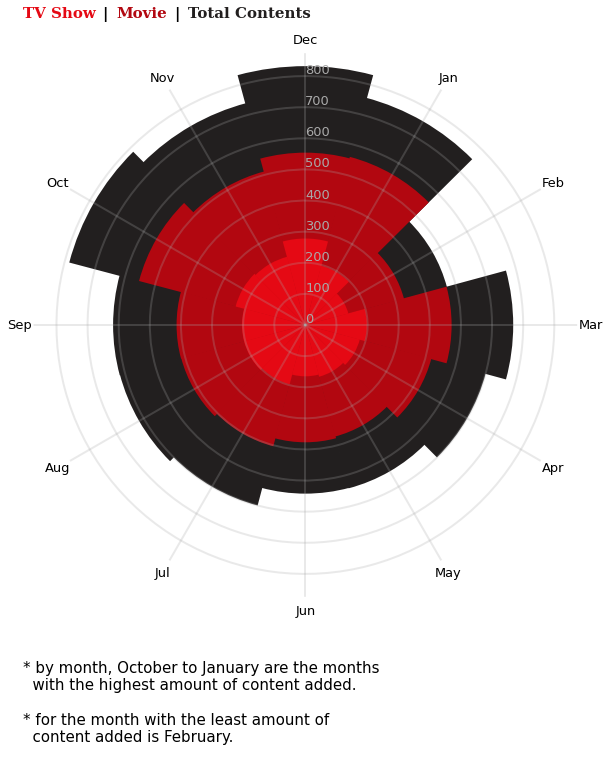

In [12]:
# import x axis into theta

angles=np.linspace(0, 2*np.pi, len(data_ma.index), endpoint=False)
# angles=np.concatenate((angles,[angles[0]]))

# plot

color_map = ["#b20710", "#e50914", "#221f1f"]

fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax = plt.subplot(111, polar=True)

ax.bar(angles, data_ma.sum(axis=1), width=.53, color=color_map[2])
for i, col in enumerate(data_ma.columns):
  ax.bar(angles, data_ma[col], width=.53, color=color_map[i])
  # ax.fill(angles, movie, color='#ff0000',alpha=0.25)

ax.set_theta_offset(angles[2]) # set the plot data to start at 60 degrees
ax.set_theta_direction(-1) # set the clockwise direction
ax.set_thetagrids((angles * 180/np.pi)[0:len(data_ma.index)], data_ma.index, fontsize = 13)

ax.set_rlabel_position(angles[-1]*180/np.pi)
ax.set_rgrids(np.arange(0, 900, 100), fontsize=13, color='darkgrey')

ax.grid(b=True, axis='both', linestyle='-', linewidth = 2, color='darkgrey', alpha=0.25)

ax.spines['polar'].set_visible(False)

# ax.set_axisbelow(True)

fig.text(0.12,.93,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color=color_map[1])
fig.text(0.23,.93,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.25,.93,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color=color_map[0])
fig.text(0.33,.93,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.35,.93,"Total Contents", fontweight="bold", fontfamily='serif', fontsize=15, color=color_map[2])

fig.text(.12,-0.1, '''
* by month, October to January are the months 
  with the highest amount of content added.
  
* for the month with the least amount of 
  content added is February.
''', fontweight="light", fontsize=15)

plt.show()

# Take a look at the rating distribution by Movie & TV Show

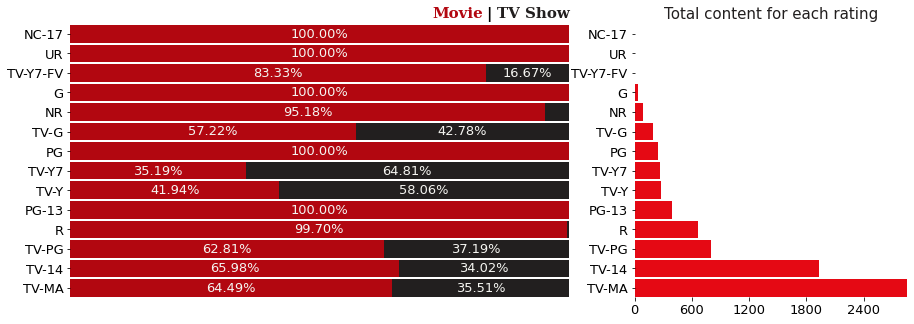

In [13]:
# select rating data group by movie and tv show

columns = ndf['type'].value_counts().index
index = ndf['rating'].value_counts().index

rate = pd.DataFrame(index=index)
for col in columns:
  rate[col] = ndf.loc[ndf['type']==col, 'rating'].value_counts()
rate.fillna(0, inplace=True)
rate_ratio = rate.divide(rate.sum(axis=1), axis=0)

# set the canvas

fig = plt.figure(figsize=(15,5))
fig.tight_layout()

ax = [None for i in range(2)]

ax[0] = plt.subplot2grid((1,15), (0,0), colspan=9)
ax[1] = plt.subplot2grid((1,15), (0,10), colspan=5)

# plot

ax[0].barh(rate_ratio.index, rate_ratio.sum(axis=1), height = 0.9, color=color_map[2])
ax[0].barh(rate_ratio.index, rate_ratio['Movie'], height = 0.9, color=color_map[0])

# annotations

for idx in rate_ratio.index:
  ax[0].annotate('{:.2f}%'.format(rate_ratio['Movie'][idx]*100),
              xy=(rate_ratio['Movie'][idx]/2, idx),
              va = 'center', ha='center',fontsize=13, 
              fontweight='light', color='#f5f5f1')

for idx in rate_ratio.index:
  if rate_ratio['TV Show'][idx] <= 0.16:
    continue
  ax[0].annotate('{:.2f}%'.format(rate_ratio['TV Show'][idx]*100),
              xy=(rate_ratio['Movie'][idx]+(rate_ratio['TV Show'][idx]/2), idx),
              va = 'center', ha='center',fontsize=13, 
              fontweight='light', color='#f5f5f1')

ax[0].set_xticks([])

ax[0].set_yticklabels(rate_ratio.index, fontsize=13)

ax[0].margins(x=0, y=0)
for s in ['top', 'left', 'right', 'bottom']:
    ax[0].spines[s].set_visible(False)

# plot number of contents each rating
ax[1].barh(rate.index, rate.sum(axis=1), height = 0.9, 
           color=color_map[1])

ax[1].set_xticks(np.arange(0, 3300, 600))
ax[1].set_xticklabels(np.arange(0, 3300, 600), fontsize=13)

ax[1].set_yticklabels(rate_ratio.index, fontsize=13)

ax[1].set_title('Total content for each rating', fontsize=15, fontweight='light', color=color_map[2])
ax[1].margins(x=0, y=0)
for s in ['top', 'left', 'right', 'bottom']:
    ax[1].spines[s].set_visible(False)

# highlight the top 3 rating with the most content

fig.text(0.46,.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color=color_map[0])
fig.text(0.51,.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.52,.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color=color_map[2])

plt.show()

# Top10 Genre in Movies and TV Shows

In [14]:
gc_mv = Counter(','.join(ndf.loc[ndf['type']=='Movie', 'listed_in']).replace(' ,',',').replace(', ',',').split(','))
gc_mv = pd.Series(dict(gc_mv)).sort_values(ascending=False)
gc_mv_percent = gc_mv/ndf['type'].value_counts()['Movie']

gc_tv = Counter(','.join(ndf.loc[ndf['type']=='TV Show', 'listed_in']).replace(' ,',',').replace(', ',',').split(','))
gc_tv = pd.Series(dict(gc_tv)).sort_values(ascending=False)
gc_tv_percent = gc_tv/ndf['type'].value_counts()['TV Show']

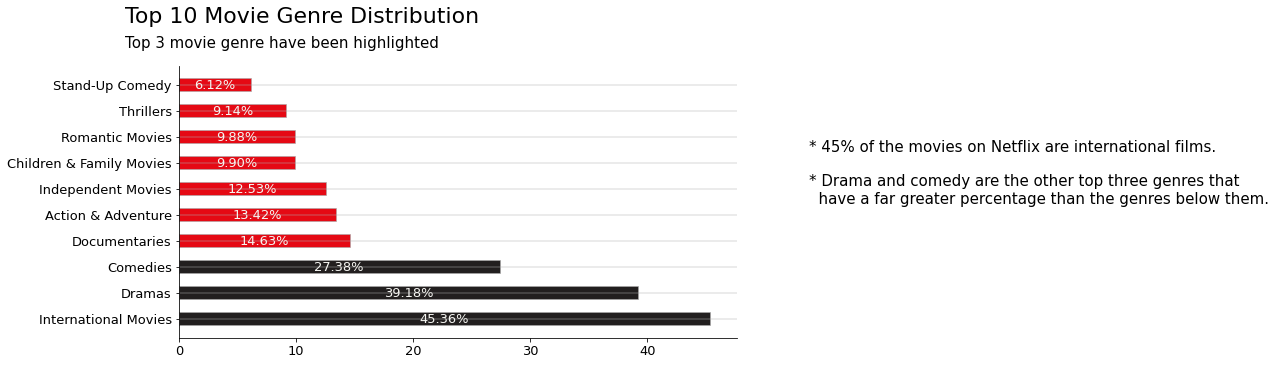

In [15]:
# plot

color_map = ['#e50914' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  "#221f1f" # color highlight

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.barh(gc_mv.head(10).index, gc_mv_percent.head(10)*100,
       height=0.5, edgecolor='darkgrey', linewidth=0.6, color=color_map)

# annotation

for idx in gc_mv.head(10).index:
  val = gc_mv_percent[idx]*100
  ax.annotate('{:.2f}%'.format(val),
              xy=(val/2, idx),
              va = 'center', ha='center',fontsize=13, 
              fontweight='light', color='#f5f5f1')

plt.yticks(range(10), gc_mv.head(10).index, fontsize=13)
ax.grid(axis='y', linestyle='-', linewidth = 2, alpha=0.25)

plt.xticks(np.arange(0,50,10), fontsize=13)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

fig.text(.05, 1, 'Top 10 Movie Genre Distribution', fontweight="light", fontsize=22)
fig.text(.05, .93, 'Top 3 movie genre have been highlighted', fontweight="light", fontsize=15)

fig.text(1, .45, '''
* 45% of the movies on Netflix are international films.

* Drama and comedy are the other top three genres that 
  have a far greater percentage than the genres below them.
''', fontweight="light", fontsize=15)


    
plt.show()

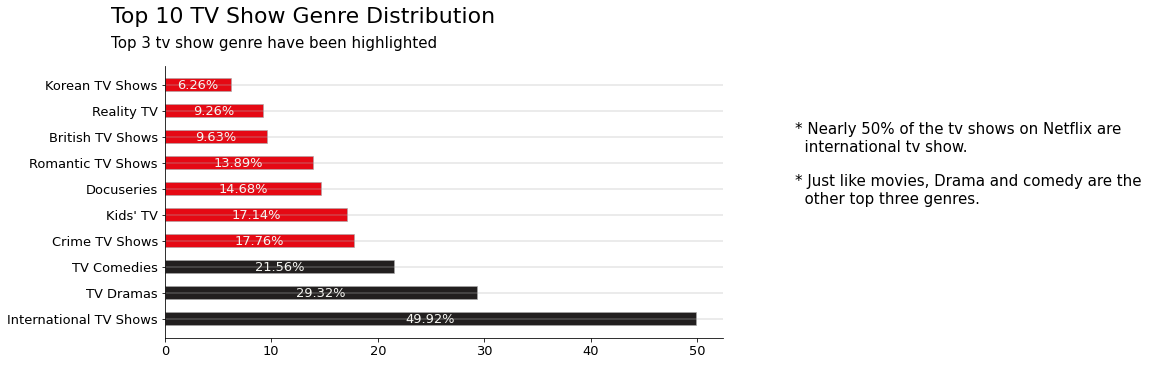

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.barh(gc_tv.head(10).index, gc_tv_percent.head(10)*100,
        height=0.5, edgecolor='darkgrey', linewidth=0.6, color=color_map)

# annotation

for idx in gc_tv.head(10).index:
  val = gc_tv_percent[idx]*100
  ax.annotate('{:.2f}%'.format(val),
              xy=(val/2, idx),
              va = 'center', ha='center',fontsize=13, 
              fontweight='light', color='#f5f5f1')

plt.yticks(range(10), gc_tv.head(10).index, fontsize=13)
ax.grid(axis='y', linestyle='-', linewidth = 2, alpha=0.25)

plt.xticks(np.arange(0,55,10), fontsize=13)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

fig.text(.05, 1, 'Top 10 TV Show Genre Distribution', fontweight="light", fontsize=22)
fig.text(.05, .93, 'Top 3 tv show genre have been highlighted', fontweight="light", fontsize=15)

fig.text(1, .45, '''
* Nearly 50% of the tv shows on Netflix are 
  international tv show.

* Just like movies, Drama and comedy are the 
  other top three genres.
''', fontweight="light", fontsize=15)    
    
plt.show()